In [1]:
## ====================================
## EET-4501 – Applied Machine Learning
## Assignment 2
## ====================================

In [2]:
## Part 1: Data Loading and Exploration

import pandas as pd

inputData = pd.read_csv("Ass2_dataset.csv")

inputData.head()

inputData.tail(10)

inputData.shape

inputData['age'].describe()

trainingData = inputData.iloc[150:250]

features = trainingData[['bmi', 'charges']]

labels = trainingData.iloc[:, -1]

trainingData2F = pd.concat([features, labels], axis=1)
trainingData2F.head()

,bmi,charges,insuranceclaim
150,24.130,5125.21570,0
151,29.700,7789.63500,1
152,37.145,6334.34355,0
153,23.370,19964.74630,1
154,25.460,7077.18940,0


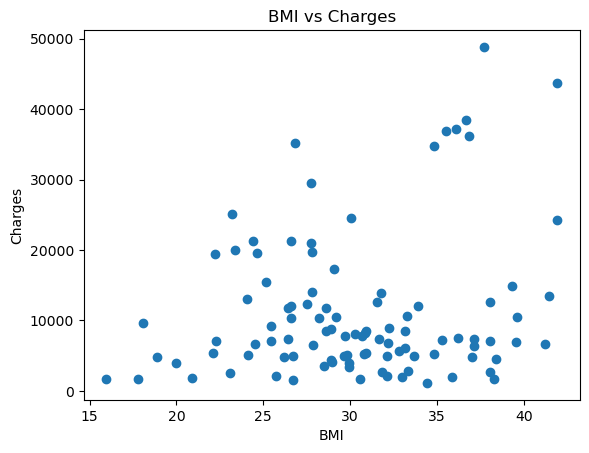

In [3]:
## Part 2: Data Visualization

import matplotlib.pyplot as plt

plt.figure()
plt.scatter(trainingData2F['bmi'], trainingData2F['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges')
plt.show()

In [4]:
## Part 3: Feature Engineering & Scaling

from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
features_normalized = minmax_scaler.fit_transform(features)

features_normalized

from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
features_standardized = standard_scaler.fit_transform(features)

features_standardized

array([[-1.07931651, -0.59993178],
       [-0.10972722, -0.33845565],
       [ 1.18624984, -0.4812725 ],
       [-1.21161235,  0.85636415],
       [-0.84779878, -0.40837239],
       [ 1.59967436, -0.42098178],
       [-1.0288352 ,  0.97991078],
       [-0.89740972,  0.41999482],
       [ 0.90512117,  2.5232585 ],
       [-0.43524463,  0.83522924],
       [-0.64935501,  0.99218077],
       [ 1.13489817,  2.44467362],
       [ 1.61360024, -0.07732323],
       [-0.09231987, -0.59729012],
       [-0.12017163, -0.60945778],
       [-0.36822634, -0.08158883],
       [ 1.16100919, -0.62884131],
       [ 0.49169666, -0.50144403],
       [ 0.26017893, -0.83604132],
       [-1.98885044, -0.62910874],
       [ 1.93911765,  0.21265353],
       [-0.00528313, -0.30636068],
       [-2.50149684, -0.93658027],
       [ 0.77804753, -0.58807385],
       [ 0.52477062, -0.8226793 ],
       [ 1.28286063,  3.68854734],
       [-0.43437426, -0.46934707],
       [-0.19676396, -0.07874188],
       [-0.248986  ,

In [5]:
## Part 4: Sampling & Cross-Validation

from sklearn.model_selection import train_test_split

X = features
y = labels

X_train, X_valandtest, y_train, y_valandtest = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_valandtest, y_valandtest, test_size=0.50, stratify=y_valandtest, random_state=42
)

from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(model, X_train, y_train, cv=kf)

cv_scores

print("Accuracy per fold:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

model.fit(X_train, y_train)
importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

feature_importance_df

## Stratified sampling ensures that each data split maintains the same class as the original dataset, which helpnprevents biases
## Feature importance helps find which input variables contribute most to the model’s predictions

Accuracy per fold: [0.57142857 0.5        0.57142857 0.64285714 0.42857143]
Mean accuracy: 0.5428571428571428


,Feature,Importance
0,bmi,0.371575
1,charges,0.628425


In [6]:
## Part 5: Data Export

trainingData2F.to_csv("Ass2Output_Lieu.csv", index=False)